# Fake news detection using ML
Aryan Kumar


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## Read datasets

In [11]:
# from google.colab import drive
# drive.mount('/content/drive')

In [12]:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd

fake = pd.read_csv("/Fake.csv")
true = pd.read_csv("/True.csv")



In [13]:
fake.shape

(23481, 4)

In [14]:
true.shape

(21417, 4)

## Data cleaning and preparation

In [15]:
# Add flag to track fake and real
fake['target'] = 'fake'
true['target'] = 'true'

In [16]:
# Concatenate dataframes
data = pd.concat([fake, true]).reset_index(drop = True)
data.shape

(44898, 5)

In [17]:
# Shuffle the data
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [18]:
# Check the data
data.head()

,title,text,subject,date,target
0,Kellyanne Conway: Trump Is ‘Gracious’ To Not ...,While not-my-president-elect Donald Trump was ...,News,"November 27, 2016",fake
1,"Obama in 'excellent' health, still using nicot...",WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,"March 8, 2016",true
2,U.S. judicial panel finds Texas hurt Latino vo...,"SAN ANTONIO, Texas (Reuters) - A special feder...",politicsNews,"April 21, 2017",true
3,UK PM May to make Brexit speech in Italy on Se...,LONDON (Reuters) - Prime Minister Theresa May ...,worldnews,"September 13, 2017",true
4,U.S. Air Force secretary nominee backs stealth...,(Reuters) - President Donald Trump’s Air Force...,politicsNews,"March 31, 2017",true


In [19]:
# Removing the date (we won't use it for the analysis)
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Kellyanne Conway: Trump Is ‘Gracious’ To Not ...,While not-my-president-elect Donald Trump was ...,News,fake
1,"Obama in 'excellent' health, still using nicot...",WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,true
2,U.S. judicial panel finds Texas hurt Latino vo...,"SAN ANTONIO, Texas (Reuters) - A special feder...",politicsNews,true
3,UK PM May to make Brexit speech in Italy on Se...,LONDON (Reuters) - Prime Minister Theresa May ...,worldnews,true
4,U.S. Air Force secretary nominee backs stealth...,(Reuters) - President Donald Trump’s Air Force...,politicsNews,true


In [20]:
# Removing the title (we will only use the text)
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,While not-my-president-elect Donald Trump was ...,News,fake
1,WASHINGTON (Reuters) - President Barack Obama ...,politicsNews,true
2,"SAN ANTONIO, Texas (Reuters) - A special feder...",politicsNews,true
3,LONDON (Reuters) - Prime Minister Theresa May ...,worldnews,true
4,(Reuters) - President Donald Trump’s Air Force...,politicsNews,true


In [21]:
# Convert to lowercase

data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,while not-my-president-elect donald trump was ...,News,fake
1,washington (reuters) - president barack obama ...,politicsNews,true
2,"san antonio, texas (reuters) - a special feder...",politicsNews,true
3,london (reuters) - prime minister theresa may ...,worldnews,true
4,(reuters) - president donald trump’s air force...,politicsNews,true


In [22]:
# Remove punctuation

import string

def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str

data['text'] = data['text'].apply(punctuation_removal)

In [23]:
# Check
data.head()

,text,subject,target
0,while notmypresidentelect donald trump was hav...,News,fake
1,washington reuters president barack obama is ...,politicsNews,true
2,san antonio texas reuters a special federal j...,politicsNews,true
3,london reuters prime minister theresa may wil...,worldnews,true
4,reuters president donald trump’s air force se...,politicsNews,true


In [24]:
# Removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
data.head()

,text,subject,target
0,notmypresidentelect donald trump twitter tantr...,News,fake
1,washington reuters president barack obama exce...,politicsNews,true
2,san antonio texas reuters special federal judi...,politicsNews,true
3,london reuters prime minister theresa may make...,worldnews,true
4,reuters president donald trump’s air force sec...,politicsNews,true


## Basic data exploration

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


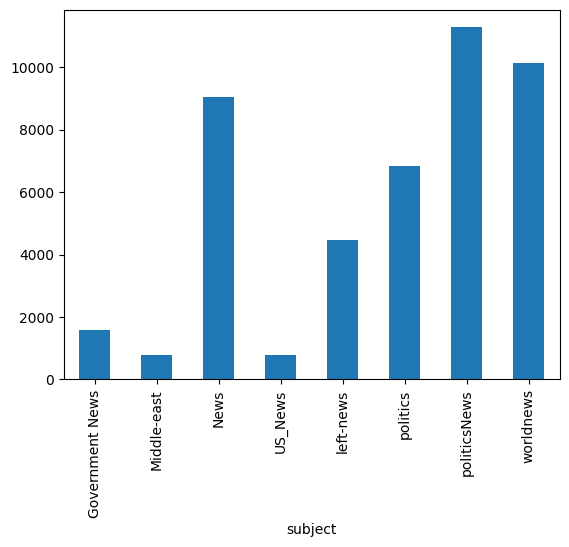

In [26]:
# How many articles per subject?
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


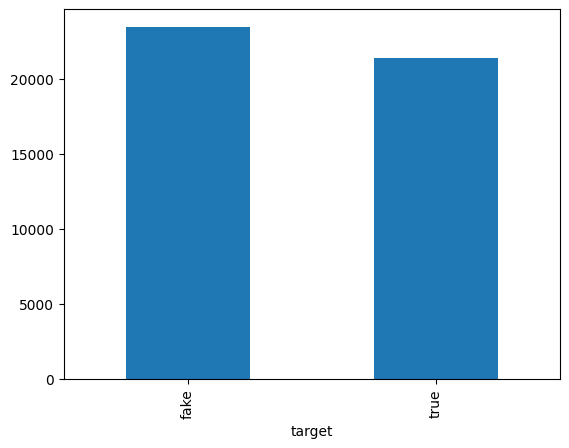

In [27]:
# How many fake and real articles?
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

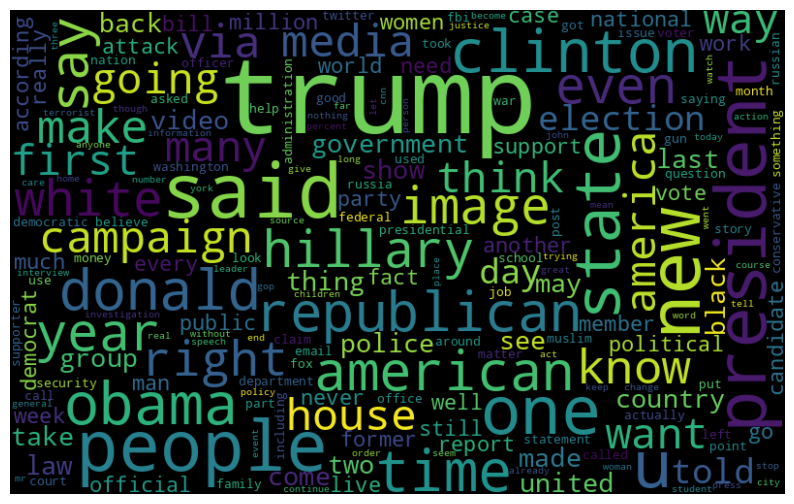

In [28]:
# Word cloud for fake news
from wordcloud import WordCloud

fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

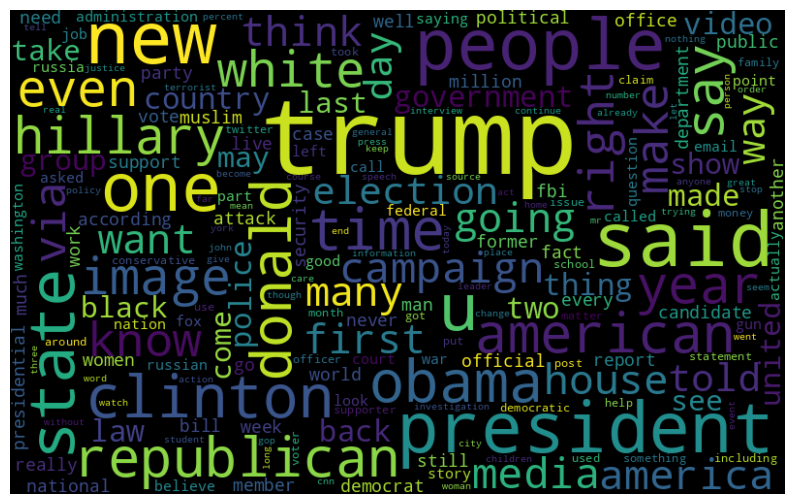

In [29]:
# Word cloud for real news
from wordcloud import WordCloud

real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])

wordcloud = WordCloud(width= 800, height= 500,
                          max_font_size = 110,
                          collocations = False).generate(all_words)

plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [30]:
# Most frequent words counter (Code adapted from https://www.kaggle.com/rodolfoluna/fake-news-detector)
from nltk import tokenize

token_space = tokenize.WhitespaceTokenizer()

def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),
                                   "Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

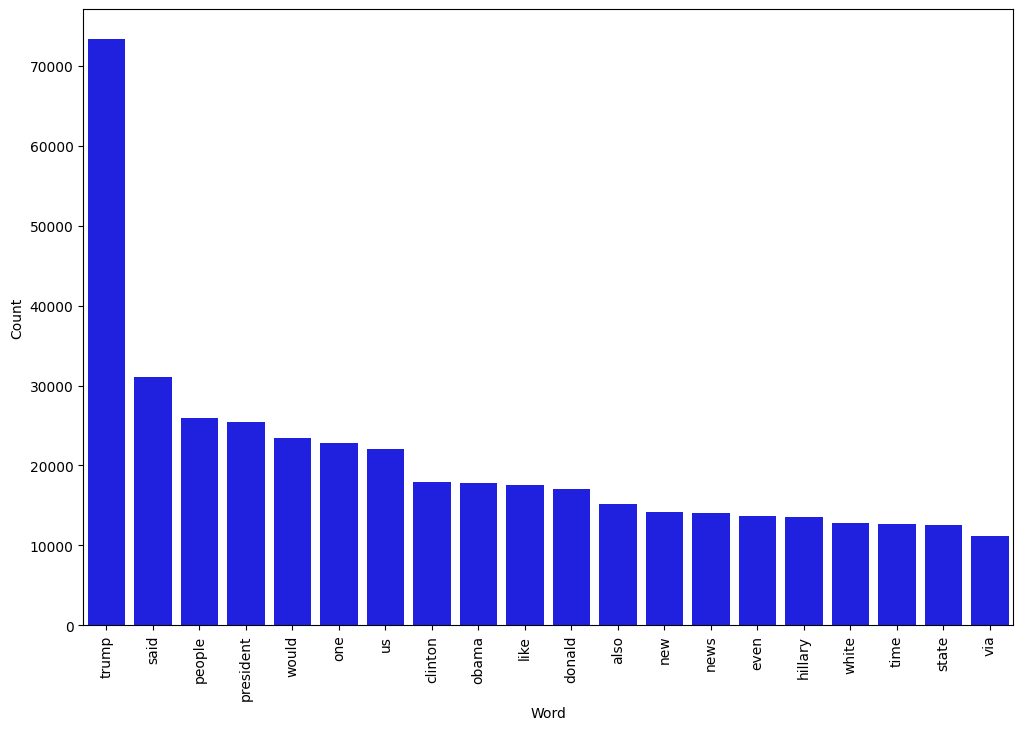

In [31]:
# Most frequent words in fake news
counter(data[data["target"] == "fake"], "text", 20)

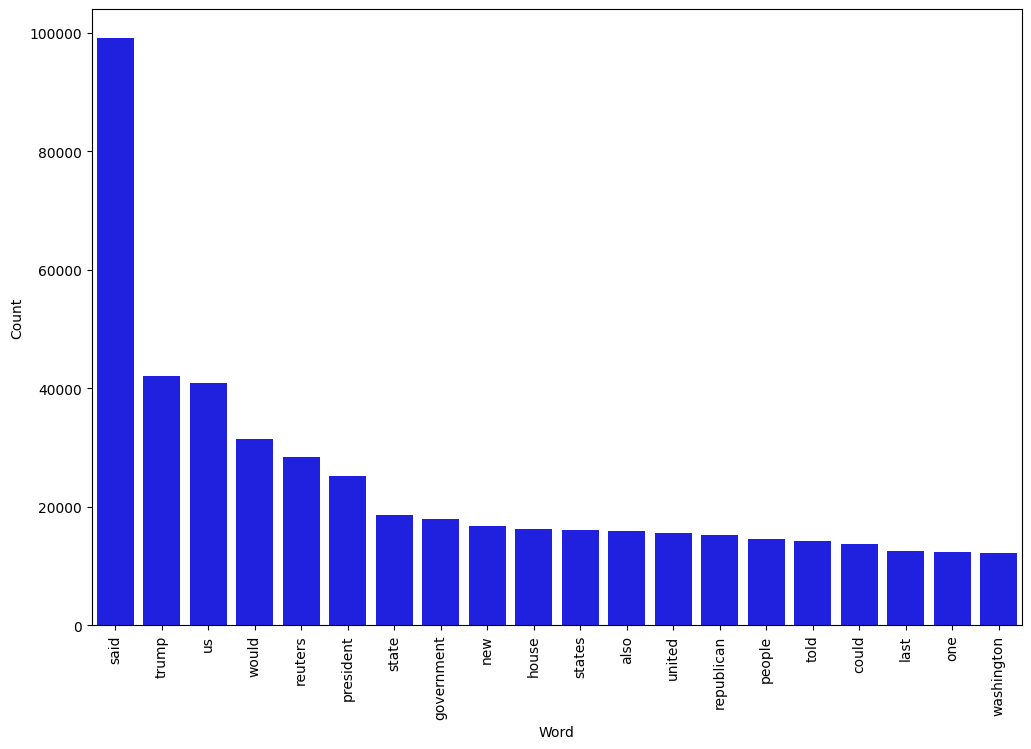

In [32]:
# Most frequent words in real news
counter(data[data["target"] == "true"], "text", 20)

## Modeling

In [33]:
# Function to plot the confusion matrix (code from https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html)
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Peparing the data

In [34]:
# Split the data
X_train,X_test,y_train,y_test = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

# **Naive Bayes**




In [35]:
dct = dict()

from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', NB_classifier)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))

dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.46%


Confusion matrix, without normalization


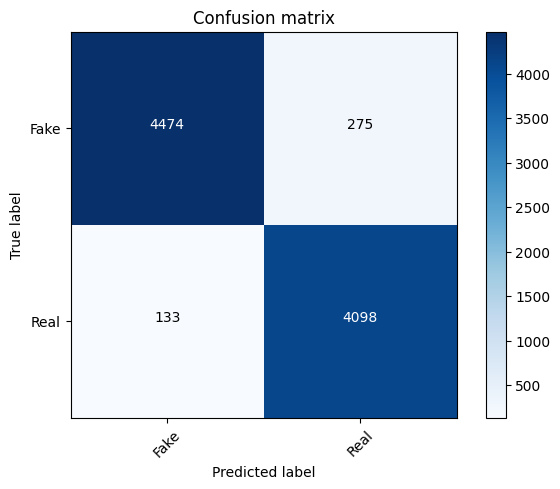

In [36]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Logistic regression**

In [37]:
# Vectorizing and applying TF-IDF
from sklearn.linear_model import LogisticRegression

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 99.06%


Confusion matrix, without normalization


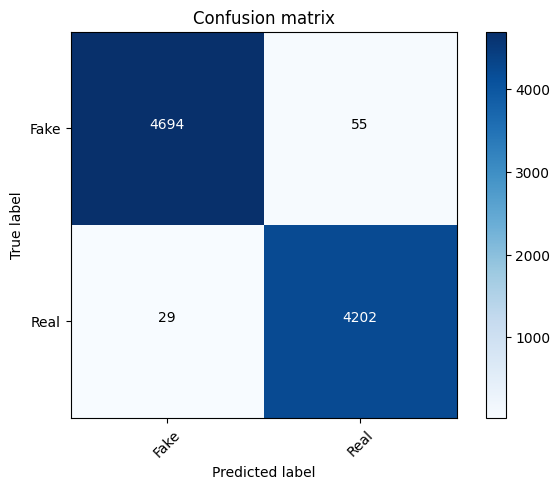

In [38]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Decision Tree**

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Vectorizing and applying TF-IDF
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 20,
                                           splitter='best',
                                           random_state=42))])
# Fitting the model
model = pipe.fit(X_train, y_train)

# Accuracy
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 99.71%


Confusion matrix, without normalization


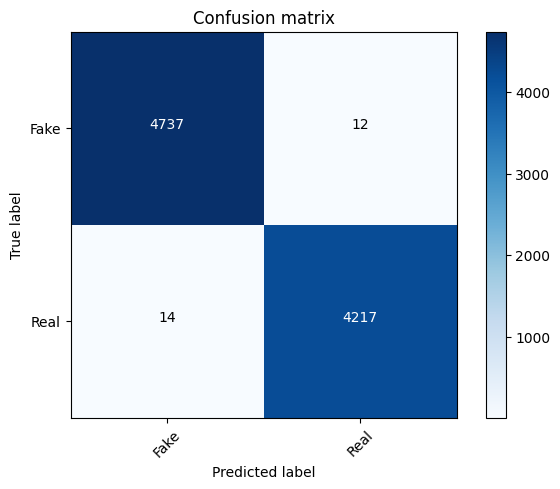

In [40]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Random Forest**

In [41]:
from sklearn.ensemble import RandomForestClassifier

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_test, prediction)*100,2)


accuracy: 99.3%


Confusion matrix, without normalization


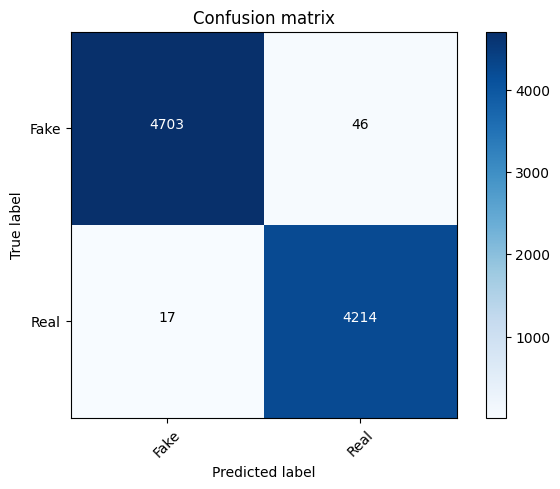

In [42]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## **SVM**

In [ ]:
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', clf)])

model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_test, prediction)*100,2)



In [ ]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **Comparing** **Different Models**

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7))
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))

#Run your own news article and check ture or false

In [ ]:
import joblib


joblib.dump(pipe, "fake_news_model.joblib")  # This saves the model in the same folder as your notebook
print("Model saved successfully.")


In [ ]:
model = joblib.load("fake_news_model.joblib")
print("Model loaded successfully.")

#Define a Function to Preprocess and Predict

In [ ]:
def predict_news_truthfulness(news_paragraph, model):
    """
    Predicts whether a given news paragraph is True or Fake using the provided model.

    Parameters:
    news_paragraph (str): The news paragraph to classify.
    model (sklearn.pipeline.Pipeline): The trained model pipeline.

    Returns:
    str: 'True' if the news is classified as true, 'Fake' otherwise.
    """
    # Create a DataFrame with the new data
    new_data = pd.Series([news_paragraph])

    # Predict the label using the provided model pipeline
    prediction = model.predict(new_data)

    # Convert numeric prediction to human-readable format
    if prediction == 1:
        return "True"
    else:
        return "Fake"


#make a prediction

In [ ]:
# Sample news paragraph for testing
sample_news_paragraph = """
The government has announced a new stimulus package to support small businesses
affected by the recent economic downturn. Experts believe this move will help
stabilize the economy and create new jobs.
"""

# Make a prediction using the function and print the result
result = predict_news_truthfulness(sample_news_paragraph, model)
print(f"The news is classified as: {result}")
